In [49]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
import wrangle_zillow as wz
import os
import acquire

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Acquire (acquire.py)

Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [50]:
df = acquire.get_zillow_data()

In [51]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,transactiondate,id.2,last_trans_date,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,parcelid.2
0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,2017-01-01,0,2017-01-01,269,Planned Unit Development,NaN,NaN,NaN,NaN,10754147
1,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,2017-01-01,1,2017-01-01,261,Single Family Residential,NaN,NaN,NaN,NaN,10759547
2,2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,...,2017-01-01,2,2017-01-01,47,Store/Office (Mixed Use),NaN,NaN,NaN,NaN,10843547
3,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,...,2017-01-01,3,2017-01-01,47,Store/Office (Mixed Use),NaN,NaN,NaN,NaN,10859147
4,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,...,2017-01-01,4,2017-01-01,31,Commercial/Office/Residential Mixed Used,NaN,NaN,NaN,NaN,10879947


## 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [52]:
#creating a function to summarize data

def summarize(df):
    '''
    this function will take in a single argument (a pandas df) 
    output to console various statistics on said dataframe, including:
    #.head()
    #.info()
    #.describe()
    #.value_counts()
    #observation of nulls in the dataframe
    '''
    #print the number of missing values
    print(f'There are total of {df.isna().sum().sum()} missing values in the entire dataframe.')
    print('')
    print('-------------------')
    #print head
    print('=================================================')
    print('Dataframe head: ')
    print(df.head(3))
    
    #print info
    print('=================================================')
    print('Dataframe info: ')
    print(df.info())
    
    #print descriptive stats
    print('=================================================')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] # not an object
    cat_cols = [col for col in df.columns if col not in num_cols]
    
    #print value counts
    print('=================================================')
    print('Dataframe value counts: ')
    for col in df. columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort = False))
    
    #print nulls by column
    print('=================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    
    #print nulls by row
    
    print('=================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=================================================')

In [53]:
summarize(df)


There are total of 2991816 missing values in the entire dataframe.

-------------------
Dataframe head: 
   id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0   0  10754147                    NaN                       NaN   
1   1  10759547                    NaN                       NaN   
2   2  10843547                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          0.0         0.0                  NaN   
1           NaN          0.0         0.0                  NaN   
2           NaN          0.0         0.0                  5.0   

   buildingqualitytypeid  calculatedbathnbr  ...  transactiondate  id.2  \
0                    NaN                NaN  ...       2017-01-01     0   
1                    NaN                NaN  ...       2017-01-01     1   
2                    NaN                NaN  ...       2017-01-01     2   

   last_trans_date  propertylandusetypeid.1        propertyl

(95678.306, 126351.3]    77327
(126351.3, 156720.6]         0
(156720.6, 187089.9]         0
(187089.9, 217459.2]         0
(217459.2, 247828.5]         0
(247828.5, 278197.8]         0
(278197.8, 308567.1]         0
(308567.1, 338936.4]         0
(338936.4, 369305.7]         0
(369305.7, 399675.0]        12
Name: regionidzip, dtype: int64
(-0.087, 8.6]    76017
(8.6, 17.2]       1592
(17.2, 25.8]         3
(25.8, 34.4]         0
(34.4, 43.0]         0
(43.0, 51.6]         0
(51.6, 60.2]         0
(60.2, 68.8]         0
(68.8, 77.4]         0
(77.4, 86.0]         1
Name: roomcnt, dtype: int64
(6.992, 6.994]     0
(6.994, 6.996]     0
(6.996, 6.997]     0
(6.997, 6.999]     0
(6.999, 7.0]      45
(7.0, 7.001]       0
(7.001, 7.003]     0
(7.003, 7.004]     0
(7.004, 7.006]     0
(7.006, 7.007]     0
Name: storytypeid, dtype: int64
(0.996, 1.3]    8138
(1.3, 1.6]         0
(1.6, 1.9]         0
(1.9, 2.2]        58
(2.2, 2.5]         0
(2.5, 2.8]         0
(2.8, 3.1]         4
(3.1, 3.4] 

                          num_rows_missing  percent_rows_missing
id                                       0              0.000000
parcelid                                 0              0.000000
airconditioningtypeid                56157             72.354214
architecturalstyletypeid             77463             99.805447
basementsqft                         77569             99.942021
...                                    ...                   ...
storytypeid.1                        77569             99.942021
storydesc                            77569             99.942021
typeconstructiontypeid.1             77448             99.786121
typeconstructiondesc                 77448             99.786121
parcelid.2                               0              0.000000

[80 rows x 2 columns]
nulls in dataframe by row: 
                 percent_cols_missing  num_rows
num_cols_missing                               
26                               32.5        12
27                       

## 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

In [54]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [55]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,56157,72.354214
architecturalstyletypeid,77463,99.805447
basementsqft,77569,99.942021
...,...,...
storytypeid.1,77569,99.942021
storydesc,77569,99.942021
typeconstructiontypeid.1,77448,99.786121
typeconstructiondesc,77448,99.786121


#### Takeaways:
- varied number of null values
- drop columns that have more than 50% missing values

## 3.1. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [56]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index().set_index('num_cols_missing')
    return rows_missing

In [8]:
nulls_by_row(df)

,percent_cols_missing,num_rows
num_cols_missing,,
26,32.5,12
27,33.75,17
28,35.0,28
29,36.25,17
30,37.5,34
31,38.75,113
32,40.0,116
33,41.25,3909
34,42.5,2684


#### Takeaways:
- 5775 rows that are missing 36 columns
- drop rows that have more than 75% missing values

## Prepare

## 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [57]:
# Restrict df to only properties that meet single use criteria
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]

# Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]


In [58]:
summarize(df)

There are total of 2586187 missing values in the entire dataframe.

-------------------
Dataframe head: 
    id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
20  20  11324547                    1.0                       NaN   
30  30  11524947                    1.0                       NaN   
31  31  11544747                    1.0                       NaN   

    basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
20           NaN          2.0         4.0                  NaN   
30           NaN          2.0         2.0                  NaN   
31           NaN          4.0         3.0                  NaN   

    buildingqualitytypeid  calculatedbathnbr  ...  transactiondate  id.2  \
20                    8.0                2.0  ...       2017-01-02    20   
30                    7.0                2.0  ...       2017-01-02    30   
31                   11.0                4.0  ...       2017-01-02    31   

    last_trans_date  propertylandusetypeid.1    

(60.619, 301.0]     16
(301.0, 539.0]       6
(539.0, 777.0]      11
(777.0, 1015.0]      2
(1015.0, 1253.0]     6
(1253.0, 1491.0]     1
(1491.0, 1729.0]     1
(1729.0, 1967.0]     0
(1967.0, 2205.0]     0
(2205.0, 2443.0]     1
Name: basementsqft, dtype: int64
(0.981, 2.85]    48340
(2.85, 4.7]      18140
(4.7, 6.55]       1294
(6.55, 8.4]        163
(8.4, 10.25]        43
(10.25, 12.1]        3
(12.1, 13.95]        1
(13.95, 15.8]        0
(15.8, 17.65]        0
(17.65, 19.5]        1
Name: bathroomcnt, dtype: int64
(0.989, 2.0]    17171
(2.0, 3.0]      28825
(3.0, 4.0]      17183
(4.0, 5.0]       3996
(5.0, 6.0]        658
(6.0, 7.0]        111
(7.0, 8.0]         31
(8.0, 9.0]          8
(9.0, 10.0]         1
(10.0, 11.0]        1
Name: bedroomcnt, dtype: int64


ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

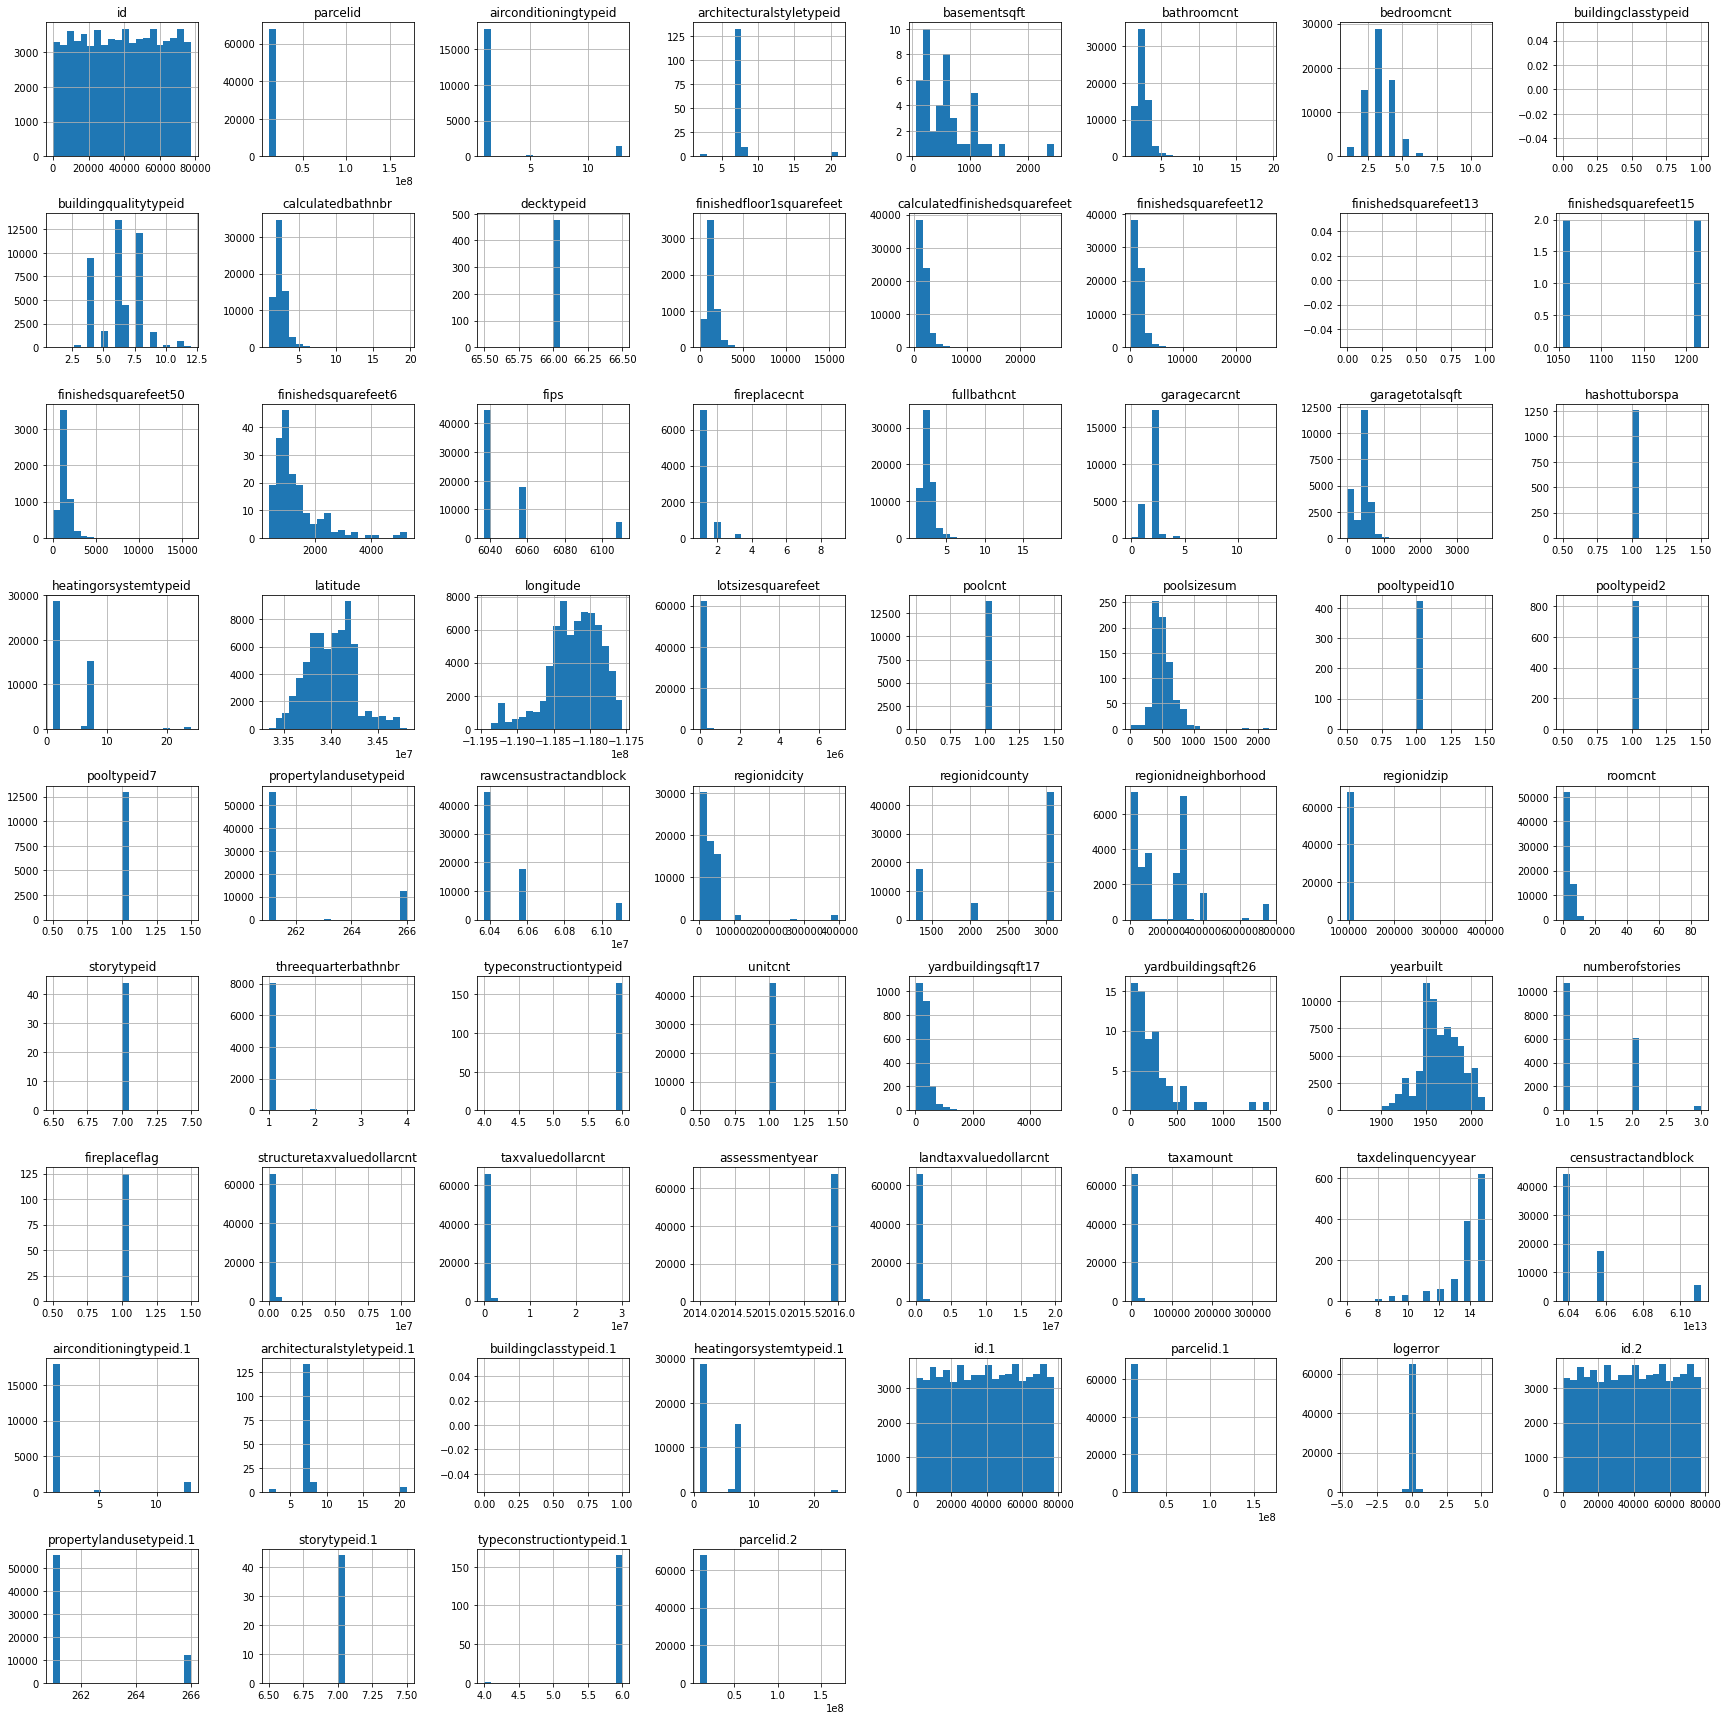

In [59]:
# visualize my numerical data types

df.hist(figsize=(24,24), bins=20)
plt.tight_layout()
plt.show()

## 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [60]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
# function that will drop rows or columns based on the percent of values that are missing:\
# handle_missing_values(df, prop_required_column, prop_required_row
    threshold = int(round(prop_required_column*len(df.index),0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [61]:
# Handle missing values i.e. drop columns and rows based on a threshold
df = handle_missing_values(df)
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,heatingorsystemdesc,id.1,parcelid.1,logerror,transactiondate,id.2,last_trans_date,propertylandusetypeid.1,propertylandusedesc,parcelid.2
20,20,11324547,2.0,4.0,8.0,2.0,3633.0,3633.0,6037.0,2.0,...,Central,20,12325145,0.042463,2017-01-02,20,2017-01-02,261,Single Family Residential,11324547
30,30,11524947,2.0,2.0,7.0,2.0,1090.0,1090.0,6037.0,2.0,...,Central,30,12713253,0.021853,2017-01-02,30,2017-01-02,266,Condominium,11524947
31,31,11544747,4.0,3.0,11.0,4.0,1620.0,1620.0,6037.0,4.0,...,Central,31,14338242,-0.019546,2017-01-02,31,2017-01-02,261,Single Family Residential,11544747
33,33,11585547,2.0,3.0,8.0,2.0,2077.0,2077.0,6037.0,2.0,...,Central,33,12155445,-0.040807,2017-01-02,33,2017-01-02,261,Single Family Residential,11585547
37,37,11617547,3.0,2.0,NaN,3.0,2735.0,2735.0,6037.0,3.0,...,Central,37,11682477,0.026208,2017-01-02,37,2017-01-02,266,Condominium,11617547


## 3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [62]:
# Add column for counties
df['county'] = df['fips'].apply(
        lambda x: 'Los Angeles' if x == 6037\
        else 'Orange' if x == 6059\
        else 'Ventura')

# drop unnecessary columns
dropcols = ['parcelid',
         'calculatedbathnbr',
         'finishedsquarefeet12',
         'fullbathcnt',
         'heatingorsystemtypeid',
         'propertycountylandusecode',
         'propertylandusetypeid',
         'propertyzoningdesc',
         'censustractandblock',
         'propertylandusedesc']



# replace nulls in unitcnt with 1
df.unitcnt.fillna(1, inplace = True)

# assume that since this is Southern CA, null means 'None' for heating system
df.heatingorsystemdesc.fillna('None', inplace = True)

# replace nulls with median values for select columns
df.lotsizesquarefeet.fillna(7313, inplace = True)
df.buildingqualitytypeid.fillna(6.0, inplace = True)

# Columns to look for outliers
df = df[df.taxvaluedollarcnt < 5_000_000]
df = df[df.calculatedfinishedsquarefeet < 8000]

# Just to be sure we caught all nulls, drop them here
df = df.dropna()

def remove_columns(df, cols_to_remove):
#remove columns not needed
    df = df.drop(columns=cols_to_remove)
    return df

In [63]:
df = remove_columns(df, dropcols)

In [64]:
df.shape

(42661, 32)

In [65]:
summarize(df)

There are total of 0 missing values in the entire dataframe.

-------------------
Dataframe head: 
        id  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
1287  1287          2.0         3.0                    8.0   
1288  1288          3.0         5.0                    9.0   
1289  1289          3.0         5.0                    8.0   

      calculatedfinishedsquarefeet    fips    latitude    longitude  \
1287                        1766.0  6037.0  34217790.0 -118628236.0   
1288                        3085.0  6037.0  34207325.0 -118662872.0   
1289                        2401.0  6037.0  34218324.0 -118637068.0   

      lotsizesquarefeet  rawcensustractandblock  ...  heatingorsystemdesc  \
1287             9085.0            6.037134e+07  ...              Central   
1288            34845.0            6.037134e+07  ...              Central   
1289            11009.0            6.037134e+07  ...              Central   

      id.1  parcelid.1  logerror  transactiondate  id.2  l

(10709354.584, 10950786.5]    5584
(10950786.5, 11189828.0]      5330
(11189828.0, 11428869.5]      2984
(11428869.5, 11667911.0]      4366
(11667911.0, 11906952.5]      3089
(11906952.5, 12145994.0]      3926
(12145994.0, 12385035.5]      3623
(12385035.5, 12624077.0]      4496
(12624077.0, 12863118.5]      4639
(12863118.5, 13102160.0]      4624
Name: parcelid.2, dtype: int64
Los Angeles    42661
Name: county, dtype: int64
nulls in dataframe by column: 
                              num_rows_missing  percent_rows_missing
id                                           0                   0.0
bathroomcnt                                  0                   0.0
bedroomcnt                                   0                   0.0
buildingqualitytypeid                        0                   0.0
calculatedfinishedsquarefeet                 0                   0.0
fips                                         0                   0.0
latitude                                     0           

## Mall Customers
### notebook
#### 1. Acquire data from mall_customers.customers in mysql database.

In [23]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [24]:
mall_df = get_mallcustomer_data()

In [25]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## 2. Summarize data (include distributions and descriptive statistics).

In [26]:
summarize(mall_df)

There are total of 0 missing values in the entire dataframe.

-------------------
Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13

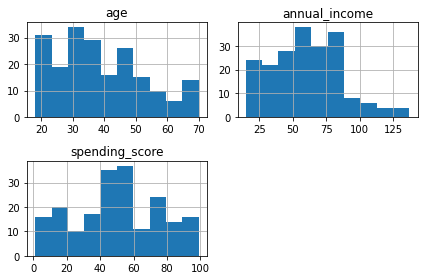

In [27]:
mall_df.hist()
plt.tight_layout()
plt.show()

## 3. Detect outliers using IQR.

In [28]:
def outlier_function(df, cols, k):
# function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df.annual_income.quantile(0.25)
        q3 = df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [29]:
mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)

In [30]:
summarize(mall_df)

There are total of 0 missing values in the entire dataframe.

-------------------
Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          198 non-null    object
 1   age             198 non-null    int64 
 2   annual_income   198 non-null    int64 
 3   spending_score  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  198.000000     198.000000      198.000000
mean    38.929293      59.787879       50.196970
std     14

## 4. Split data (train, validate, and test split).

In [43]:
# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [44]:
train.shape, validate.shape, test.shape

((110, 4), (48, 4), (40, 4))

## 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [33]:
mall_df.dtypes

gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [34]:
dummy_df = pd.get_dummies(mall_df.gender, drop_first=True) # the only catagorical column
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns=['gender'])

## 6. Handles missing values.

In [35]:
#no missing values
mall_df.isna().sum()

age               0
annual_income     0
spending_score    0
Male              0
dtype: int64

## 7. Scaling

In [40]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns) # taking in columns that are only numerical
    scaler = MinMaxScaler()
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [42]:
scaler, train, val, test = acquire.wrangle_mall_df()

NameError: name 'train_test_split' is not defined

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 46 to 59
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             110 non-null    int64
 1   annual_income   110 non-null    int64
 2   spending_score  110 non-null    int64
 3   Male            110 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 3.5 KB


In [46]:
train.head()

,age,annual_income,spending_score,Male
customer_id,,,,
46,24,39,65,0
40,20,37,75,0
12,35,19,99,0
172,28,87,75,1
96,24,60,52,1


In [47]:
validate.head()

,age,annual_income,spending_score,Male
customer_id,,,,
177,58,88,15,1
150,34,78,90,1
156,27,78,89,0
118,49,65,59,0
69,19,48,59,1


In [48]:
test.head()

,age,annual_income,spending_score,Male
customer_id,,,,
157,37,78,1,1
27,45,28,32,0
63,67,47,52,0
32,21,30,73,0
21,35,24,35,1
